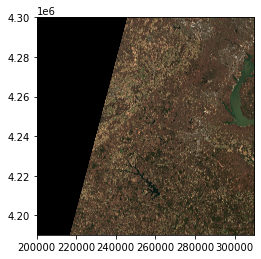

<AxesSubplot:>

In [7]:
import rasterio
from matplotlib import pyplot as plt

# Import and view image
# It would not let me import the three bands
image_file = "T18STH_20220311T155051_TCI_10m.jp2"

my_image = rasterio.open(image_file)
my_image

from rasterio.plot import show
show(my_image)

In [2]:
# Create bounds

xmin = 304057.0
ymin = 4282538.0
xmax = 305165.0
ymax = 4283042.0

In [3]:
# Create geojson
my_geojson = [
    {
        "type": "Polygon", #let's define our geometry type, which as we have a square, is a polygon.
        "coordinates": [   #Here are our actual geometry coordinates
          [
            [
              xmin,
              ymin
            ],
            [
              xmax,
              ymin
            ],
            [
              xmax,
              ymax
            ],
            [
              xmin,
              ymax
            ],
            [
              xmin,
              ymin
            ]
          ],
        ]
      }
    ]
my_geojson

[{'type': 'Polygon',
  'coordinates': [[[304057.0, 4282538.0],
    [305165.0, 4282538.0],
    [305165.0, 4283042.0],
    [304057.0, 4283042.0],
    [304057.0, 4282538.0]]]}]

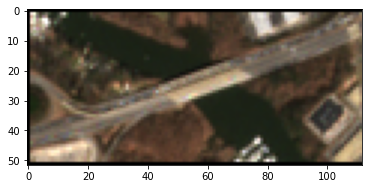

<AxesSubplot:>

In [4]:
from rasterio.mask import mask

# Apply rasterio mask
with rasterio.open(image_file) as img:
    clipped, transform = mask(img, my_geojson, crop=True)

# View image
show(clipped)

In [6]:
# Copy over meta data
meta = my_image.meta.copy()

# Update metda and write out the clipped image to a .tif file
meta.update(
    {
    
        "transform": transform,
        "height":clipped.shape[1],
        "width":clipped.shape[2]
    }
)

# write image to a geotiff
with rasterio.open('clipped.tif', 'w', **meta) as dst:
    dst.write(clipped)
    
print('Writing complete')

Writing complete
